In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [260]:
import os 
os.chdir('E:\projects')
d=pd.read_csv('fuel_efficiency.csv')
d.drop(data.iloc[:,:1],axis=1,inplace=True)
l=d.copy()
d

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


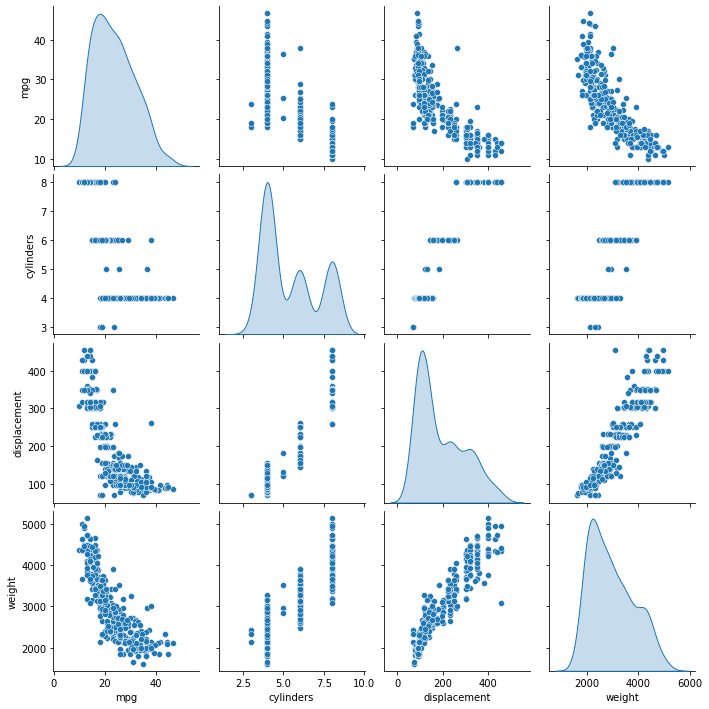

In [48]:
sns.pairplot(train_dataset[['mpg','cylinders','displacement','weight']], diag_kind="kde")

In [279]:
d['car name']=pd.get_dummies(d['car name'])

In [280]:
d['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 104, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

In [281]:
d['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [282]:
d['cylinders']=d['cylinders'].astype(str)
d['cylinders']=d['cylinders'].apply(lambda x:x.replace('',''))
d['cylinders']=d['cylinders'].astype(int)

In [283]:
d['cylinders'].dtype

dtype('int32')

In [284]:
d['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 104, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

In [285]:
d['horsepower']=d['horsepower'].astype(str)
d['horsepower']=d['horsepower'].apply(lambda v:v.replace('?','104'))
d['horsepower']=d['horsepower'].astype(int)

In [286]:
d['horsepower'].mean()

104.46231155778895

In [287]:
d['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 104, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

In [306]:
x=d.drop(['mpg'],axis=1)
label=l.pop('mpg')

In [322]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130,3504,12.0,70,1,1
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,1
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1
...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,1
394,4,97.0,52,2130,24.6,82,2,1
395,4,135.0,84,2295,11.6,82,1,1
396,4,120.0,79,2625,18.6,82,1,1


In [395]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,label)

In [408]:
y_test.shape

(100,)

In [396]:
x_train.shape

(298, 8)

In [317]:
train.shape

(298, 8)

In [404]:
y_test

244    43.1
274    20.3
79     26.0
33     19.0
372    27.0
       ... 
84     27.0
289    16.9
259    20.8
377    31.0
82     23.0
Name: mpg, Length: 100, dtype: float64

In [367]:
from  sklearn.ensemble import RandomForestRegressor

In [443]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [444]:
pred=RF.predict(x_test)

In [445]:
RF.score(x_test,y_test)

0.8708585690059287

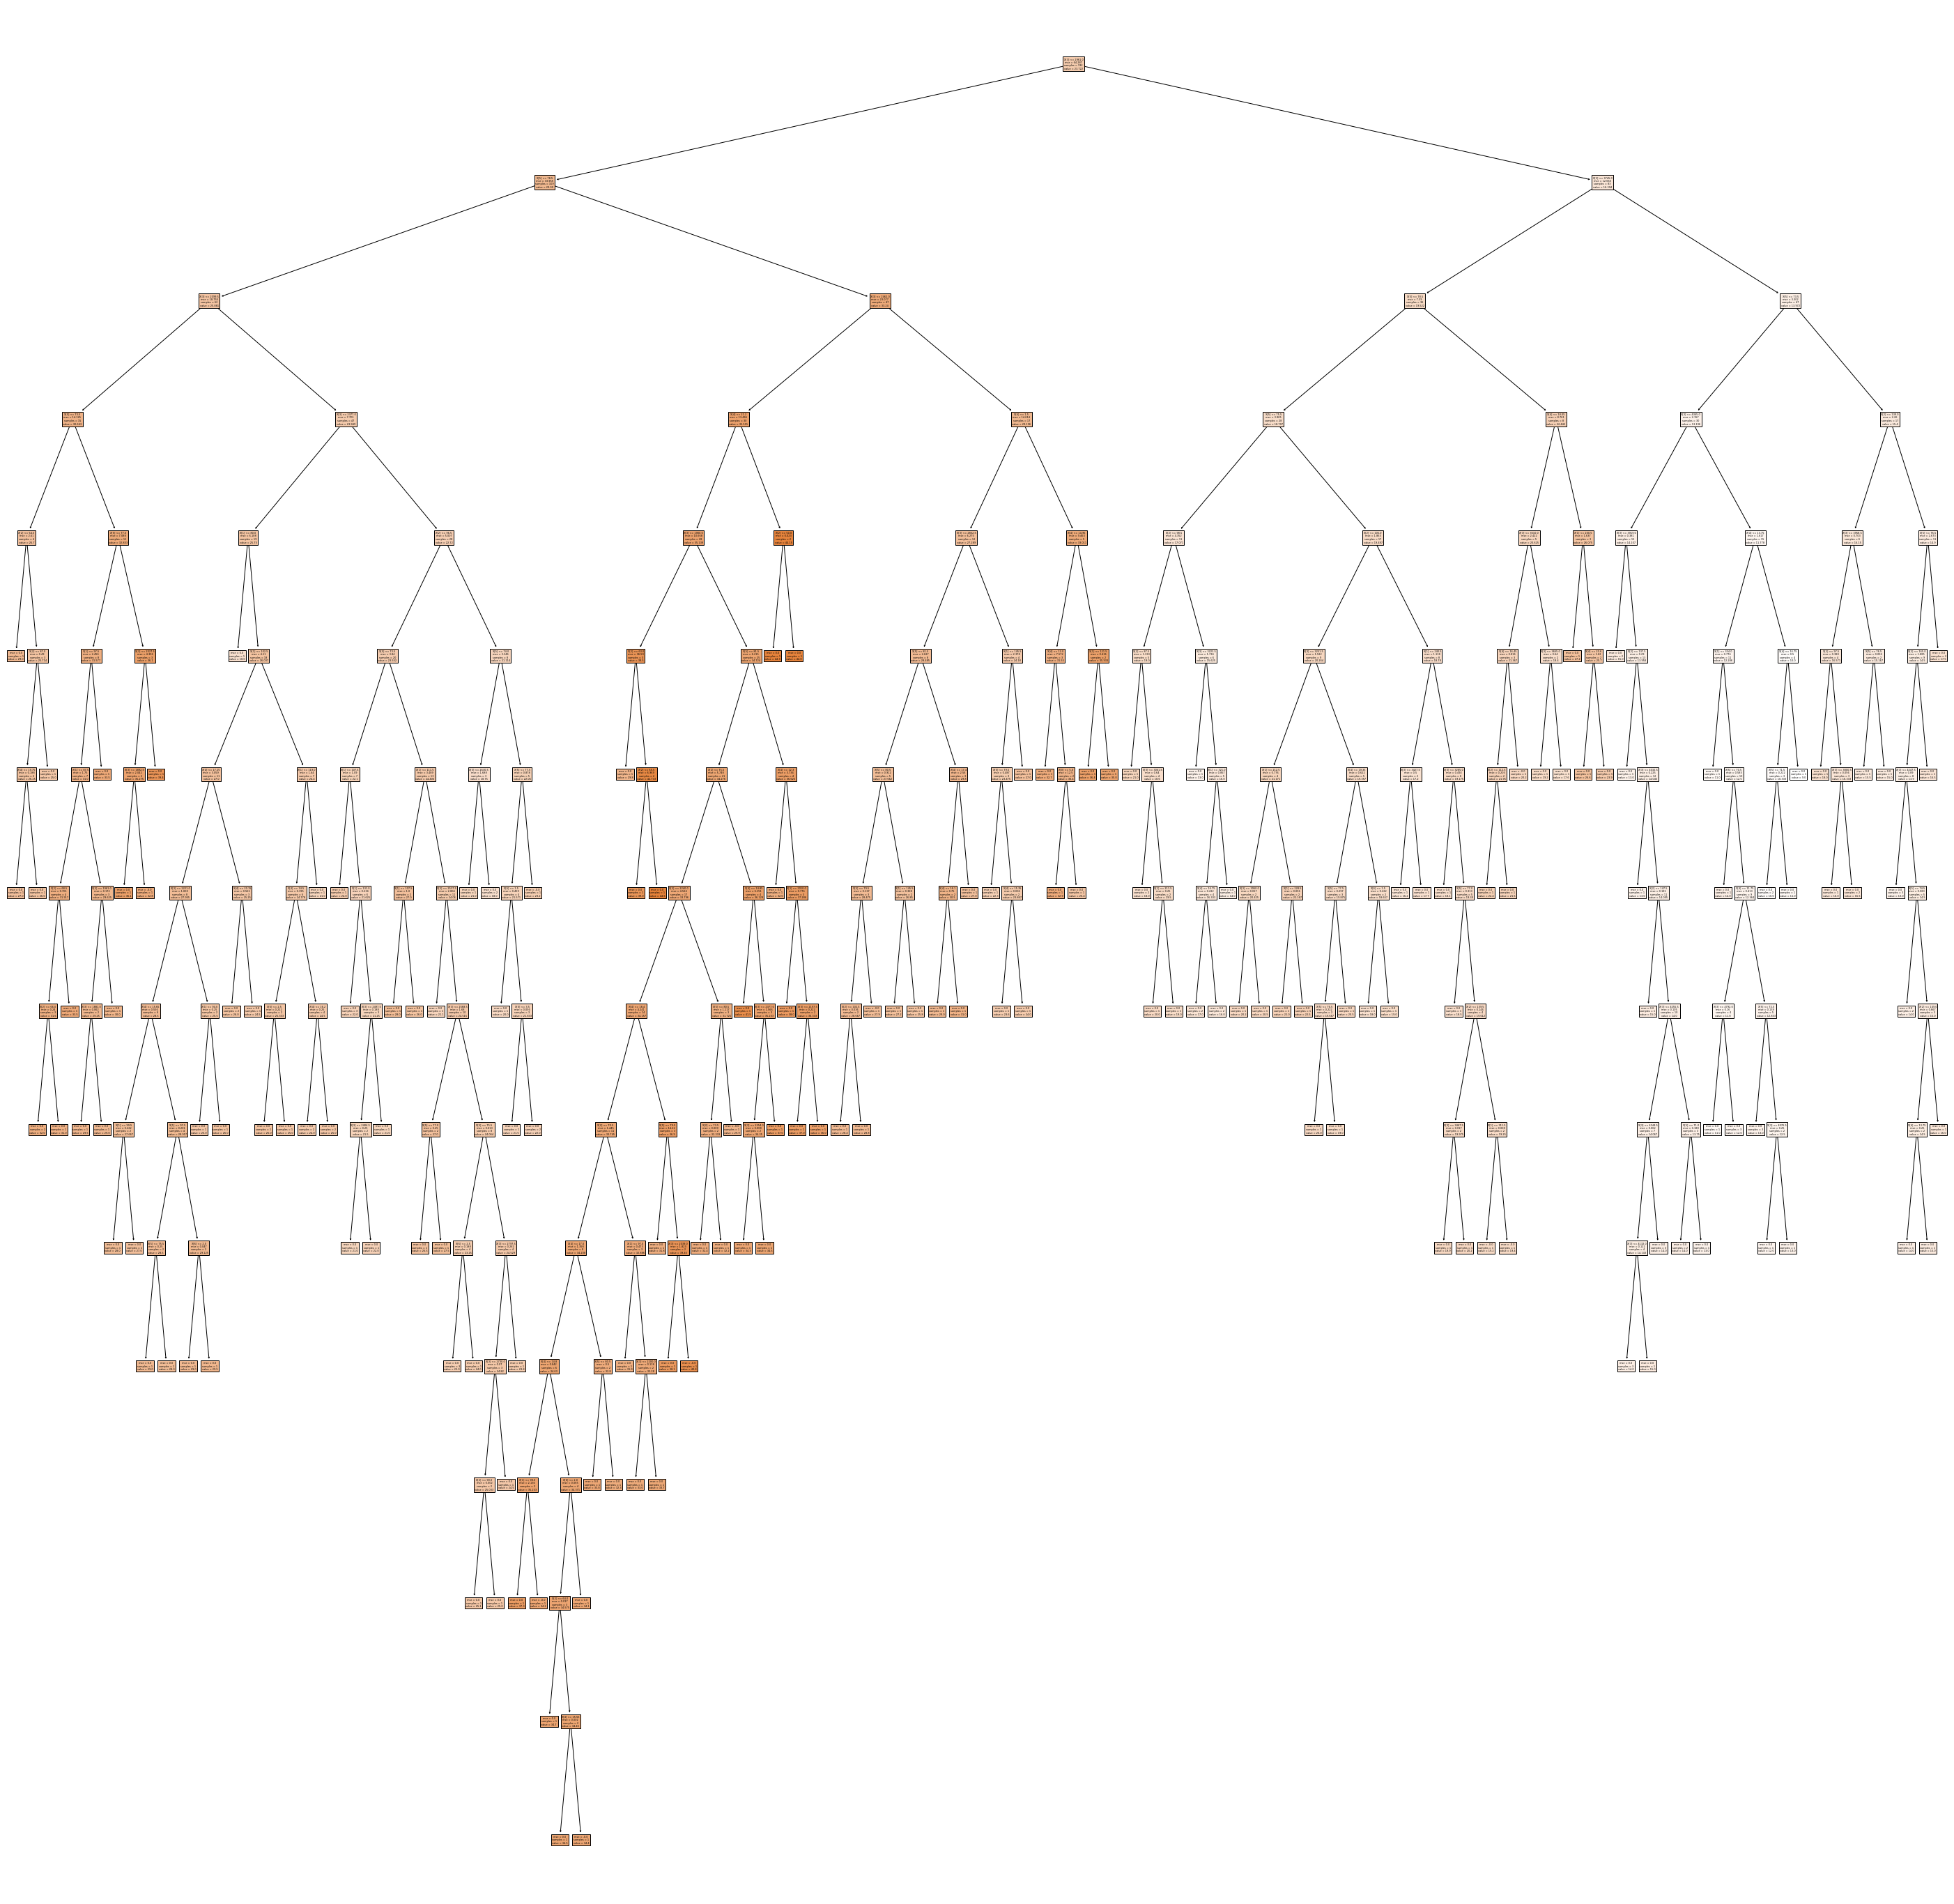

In [437]:
from sklearn.tree import export_graphviz
e = RF.estimators_[5]
plt.figure(figsize=(50,50))
tree.plot_tree(e,filled=True)
plt.show()

In [446]:
s=pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":pred})
s

,Actual Rating,Predicted Rating
244,43.1,35.983
274,20.3,22.434
79,26.0,26.983
33,19.0,19.982
372,27.0,27.511
...,...,...
84,27.0,26.864
289,16.9,15.547
259,20.8,20.495
377,31.0,36.810
